In [202]:
import pandas as pd
import numpy as np
import black
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib
# save to parquet
# df.to_parquet("data.parquet")

# %cd C:\Users\linth\PycharmProjects\FAIP
# print(os.getcwd())

In [210]:
matplotlib.rc("font", size=16, family='Candara')
# to check out which fonts there are
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Windows\\Fonts\\seguibl.ttf',
 'C:\\Windows\\Fonts\\Candaraz.ttf',
 'C:\\Windows\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\CALIFR.TTF',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAR.TTF',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\Windows\\Fonts\\LCALLIG.TTF',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\symbol.ttf',
 'C:\\Windows\\Fonts\\BASKVILL.TTF',
 'C:\\Windows\\Fonts\\TCB_____.TTF',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\BRLNSR.TTF',
 'C:\\Windows\\Fonts\\GOUDYSTO.TTF',
 'C:\\Windows\\Fonts\\FORTE.TTF',
 'C:\\Windows\\Fonts\\arialbd.ttf',
 'C:\\Windows\\Fonts\\GILB____.TTF',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\COOPBL.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\YuGothB.ttc

# importing, viewing DF

In [170]:
df = pd.read_csv(
    "data/flightlist_20220601_20220630.csv.gz",
    parse_dates=["day", "firstseen", "lastseen"]
)

In [172]:
df = df.drop("number", axis=1).dropna(subset=["typecode", "origin", "destination"])

In [173]:
# parquet is much faster and smaller than csv!!
df.to_parquet("data/flightlist_202206.parquet", index=False) 

In [183]:
df2 = pd.read_parquet("data/flightlist_202206.parquet")

In [45]:
# random sample, tail, head
df2.sample(5)

# consistency use random_state, for sharing
df2.sample(5, random_state=42)

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
413541,UAL2383,ab6542,N833UA,A319,KPHL,KDEN,2022-06-12 15:18:05+00:00,2022-06-12 18:53:29+00:00,2022-06-12 00:00:00+00:00,39.873714,-75.230469,0.0,39.796326,-104.642148,1866.90
849731,AUA8FG,44081f,OE-LWC,E195,EDDS,LOWW,2022-06-24 15:46:30+00:00,2022-06-24 16:42:18+00:00,2022-06-24 00:00:00+00:00,48.693237,9.239572,304.8,48.116089,16.554131,213.36
261844,OCN4,3c6564,D-AIKD,A333,EDDM,MDBG,2022-06-08 10:59:52+00:00,2022-06-08 20:41:58+00:00,2022-06-08 00:00:00+00:00,48.343987,11.794040,304.8,18.550644,-68.559494,1028.70
977540,JBU389,a43fba,N373JB,E190,KBOS,KEWR,2022-06-28 11:32:31+00:00,2022-06-28 12:24:55+00:00,2022-06-28 00:00:00+00:00,42.377014,-71.021949,304.8,40.682098,-74.171387,-60.96
561766,SWA3068,ac8777,N906WN,B737,KSAT,KSAN,2022-06-16 16:00:05+00:00,2022-06-16 18:24:59+00:00,2022-06-16 00:00:00+00:00,29.527759,-98.466258,0.0,32.728504,-117.168629,106.68


In [48]:
# show columns
df.columns

# by default, 60 rows, 20 columns, to set paramater, max rows/columns
pd.options.display.max_rows = 100

In [53]:
df

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,CCA583,78103e,B-7973,B77W,KLAX,EDDF,2022-05-31 00:35:53+00:00,2022-06-01 13:08:22+00:00,2022-06-01 00:00:00+00:00,33.947288,-118.431473,0.0,50.041188,8.591383,121.92
3,CES7097,7807d5,B-6537,A332,YSSY,ELLX,2022-05-31 02:44:11+00:00,2022-06-01 08:48:36+00:00,2022-06-01 00:00:00+00:00,-33.943331,151.166782,0.0,49.635727,6.236476,350.52
4,BOX598,3c4582,D-AALB,B77L,EDDP,KLAX,2022-05-31 04:03:44+00:00,2022-06-01 08:45:52+00:00,2022-06-01 00:00:00+00:00,51.413409,12.242889,0.0,33.947937,-118.424041,7.62
10,CES7009,780851,B-6546,A332,YMML,EGLL,2022-05-31 07:31:20+00:00,2022-06-01 12:09:50+00:00,2022-06-01 00:00:00+00:00,-37.663010,144.836854,0.0,51.465268,-0.313339,441.96
16,ALK121,770590,4R-ALP,A333,YSSY,VOMM,2022-05-31 09:23:03+00:00,2022-06-01 04:24:20+00:00,2022-06-01 00:00:00+00:00,-33.935883,151.173363,0.0,12.999710,80.194513,152.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174226,N130NB,a07c5f,N130NB,EC30,KI73,3OH1,2022-06-30 23:42:29+00:00,2022-06-30 23:53:08+00:00,2022-06-30 00:00:00+00:00,39.694885,-84.192949,304.8,39.759940,-84.599243,533.40
3174232,CMD5,ab7a0c,N839CS,EC35,KRHV,KE16,2022-06-30 23:43:09+00:00,2022-06-30 23:53:25+00:00,2022-06-30 00:00:00+00:00,37.361435,-121.848430,0.0,37.071083,-121.662359,518.16
3174243,N8PQ,aade7f,N8PQ,AC90,KSBD,KSBD,2022-06-30 23:45:19+00:00,2022-06-30 23:56:49+00:00,2022-06-30 00:00:00+00:00,34.057291,-117.295647,609.6,34.065170,-117.245029,746.76
3174247,MRA700,ad46af,N9546B,C208,7NC3,KRDU,2022-06-30 23:47:19+00:00,2022-06-30 23:58:22+00:00,2022-06-30 00:00:00+00:00,35.610168,-78.196220,914.4,35.862773,-78.767648,121.92


# Selecting data

In [58]:
# select by names: df[column]
df[["callsign", "origin"]]


,callsign,origin
0,CCA583,KLAX
3,CES7097,YSSY
4,BOX598,EDDP
10,CES7009,YMML
16,ALK121,YSSY
...,...,...
3174226,N130NB,KI73
3174232,CMD5,KRHV
3174243,N8PQ,KSBD
3174247,MRA700,7NC3


In [60]:
# select by location: df.iloc[i:j]
df.loc[:, ["callsign"]] # specify desired ROWS
df.iloc[0:10, [0, 4, 5]] # specify ROWS and COLUMNS

,callsign,origin,destination
0,CCA583,KLAX,EDDF
3,CES7097,YSSY,ELLX
4,BOX598,EDDP,KLAX
10,CES7009,YMML,EGLL
16,ALK121,YSSY,VOMM
17,FDX6010,YSSY,PANC
18,GTI8157,RKSI,EHAM
19,AIC183,VIDP,KSFO
20,N,FAOR,SKBO
23,DLH767,EDDM,EDDM


In [61]:
# select by conditions: df.loc[conditions]
df[df.origin=="EHAM"]

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
106,UAL2785,a2a3b6,N26967,B789,EHAM,KSFO,2022-05-31 14:19:51+00:00,2022-06-01 00:20:54+00:00,2022-06-01 00:00:00+00:00,52.335159,4.709473,0.0,37.617234,-122.365961,0.00
186,KLM663,4843f2,PH-BQO,B772,EHAM,KDWH,2022-05-31 15:35:33+00:00,2022-06-01 01:13:16+00:00,2022-06-01 00:00:00+00:00,52.317261,4.763718,0.0,30.007386,-95.535571,914.40
237,KLM871,4851f7,PH-BVU,B77W,EHAM,VIDP,2022-05-31 16:20:16+00:00,2022-06-01 00:13:36+00:00,2022-06-01 00:00:00+00:00,52.317127,4.760376,0.0,28.544495,77.078071,304.80
425,ETD918,896442,A6-DDE,B77L,EHAM,OMAA,2022-05-31 18:16:17+00:00,2022-06-01 00:08:56+00:00,2022-06-01 00:00:00+00:00,52.299205,4.763436,0.0,24.447001,54.631538,160.02
472,UAE7GV,89616d,A6-EFG,B77L,EHAM,OMDW,2022-05-31 18:42:09+00:00,2022-06-01 00:46:53+00:00,2022-06-01 00:00:00+00:00,52.299717,4.764849,0.0,24.892738,55.168158,129.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169273,KLM1451,484acb,PH-EZA,E190,EHAM,EGPD,2022-06-30 21:54:30+00:00,2022-06-30 22:47:35+00:00,2022-06-30 00:00:00+00:00,52.302109,4.771042,-304.8,57.153625,-2.162075,350.52
3169405,KLM1981,48415e,PH-BXE,B738,EHAM,LHBP,2022-06-30 21:56:21+00:00,2022-06-30 23:38:48+00:00,2022-06-30 00:00:00+00:00,52.296412,4.756766,-304.8,47.417923,19.302345,182.88
3171443,KLM73W,484161,PH-BXH,B738,EHAM,LKPR,2022-06-30 22:27:52+00:00,2022-06-30 23:33:36+00:00,2022-06-30 00:00:00+00:00,52.296318,4.756688,-304.8,50.111069,14.261320,358.14
3171519,EZY95TU,40643a,G-EZTZ,A320,EHAM,EGCC,2022-06-30 22:29:02+00:00,2022-06-30 23:18:57+00:00,2022-06-30 00:00:00+00:00,52.300415,4.766654,-304.8,53.363342,-2.255186,114.30


In [64]:
# select by conditions with query: df.query(conditions)
df.query("origin == 'EHAM' and destination == 'LEMD' and day.dt.day==1")
# and query.query.query

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
22447,KLM61Z,484fde,PH-BCD,B738,EHAM,LEMD,2022-06-01 05:14:27+00:00,2022-06-01 07:33:07+00:00,2022-06-01 00:00:00+00:00,52.291989,4.744838,0.0,40.521149,-3.559326,548.64
25370,IBS3721,34224e,EC-JLI,A321,EHAM,LEMD,2022-06-01 06:14:17+00:00,2022-06-01 08:39:47+00:00,2022-06-01 00:00:00+00:00,52.299624,4.764614,0.0,40.508331,-3.574707,571.50
34493,AEA1098,34615a,EC-NBM,B789,EHAM,LEMD,2022-06-01 09:17:43+00:00,2022-06-01 11:23:38+00:00,2022-06-01 00:00:00+00:00,52.300275,4.766262,-304.8,40.514282,-3.559265,556.26
50102,KLM77A,484559,PH-BGB,B738,EHAM,LEMD,2022-06-01 12:50:12+00:00,2022-06-01 15:00:48+00:00,2022-06-01 00:00:00+00:00,52.294052,4.750443,-304.8,40.522280,-3.559321,571.50
79619,IBS3725,342090,EC-ILR,A320,EHAM,LEMD,2022-06-01 17:39:09+00:00,2022-06-01 20:02:16+00:00,2022-06-01 00:00:00+00:00,52.333557,4.709320,-304.8,40.476240,-3.567248,586.74
88422,KLM75U,484ee5,PH-HSE,B738,EHAM,LEMD,2022-06-01 19:12:00+00:00,2022-06-01 21:32:48+00:00,2022-06-01 00:00:00+00:00,52.292175,4.745483,-304.8,40.475774,-3.538159,563.88


In [67]:
# apply and groupby (but apply is slow!)
df1 = df.query("day.dt.day == 1")
# df1.apply(FUNCTION, AXIS) 
# FUNCTION(DF)

# Create new columns

In [69]:
# create new columns not doing this df["newcol"] = [1, 2, 3] BC slicing BUT
# df3 = df.assign(new_col=[a, b, c])
# if youre doing it, copy the DF first!! with .copy()

In [ ]:
df1.assign(distance=distance)
df1.assign(
    distance=lambda d: d.apply(FUNCTION, AXIS)
)  # apply function to create new column with calculations

# one liner doing all three tasks at once
df.query("day.dt.day==1").assign(distance=lambda d: d.apply(FUNCTION, AXIS)

In [128]:
df1.assign(distance=100)

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,duration,distance
106,UAL2785,a2a3b6,N26967,B789,EHAM,KSFO,2022-05-31 14:19:51+00:00,2022-06-01 00:20:54+00:00,2022-06-01 00:00:00+00:00,52.335159,4.709473,0.0,37.617234,-122.365961,0.00,0 days 10:01:03,100
186,KLM663,4843f2,PH-BQO,B772,EHAM,KDWH,2022-05-31 15:35:33+00:00,2022-06-01 01:13:16+00:00,2022-06-01 00:00:00+00:00,52.317261,4.763718,0.0,30.007386,-95.535571,914.40,0 days 09:37:43,100
237,KLM871,4851f7,PH-BVU,B77W,EHAM,VIDP,2022-05-31 16:20:16+00:00,2022-06-01 00:13:36+00:00,2022-06-01 00:00:00+00:00,52.317127,4.760376,0.0,28.544495,77.078071,304.80,0 days 07:53:20,100
425,ETD918,896442,A6-DDE,B77L,EHAM,OMAA,2022-05-31 18:16:17+00:00,2022-06-01 00:08:56+00:00,2022-06-01 00:00:00+00:00,52.299205,4.763436,0.0,24.447001,54.631538,160.02,0 days 05:52:39,100
472,UAE7GV,89616d,A6-EFG,B77L,EHAM,OMDW,2022-05-31 18:42:09+00:00,2022-06-01 00:46:53+00:00,2022-06-01 00:00:00+00:00,52.299717,4.764849,0.0,24.892738,55.168158,129.54,0 days 06:04:44,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169273,KLM1451,484acb,PH-EZA,E190,EHAM,EGPD,2022-06-30 21:54:30+00:00,2022-06-30 22:47:35+00:00,2022-06-30 00:00:00+00:00,52.302109,4.771042,-304.8,57.153625,-2.162075,350.52,0 days 00:53:05,100
3169405,KLM1981,48415e,PH-BXE,B738,EHAM,LHBP,2022-06-30 21:56:21+00:00,2022-06-30 23:38:48+00:00,2022-06-30 00:00:00+00:00,52.296412,4.756766,-304.8,47.417923,19.302345,182.88,0 days 01:42:27,100
3171443,KLM73W,484161,PH-BXH,B738,EHAM,LKPR,2022-06-30 22:27:52+00:00,2022-06-30 23:33:36+00:00,2022-06-30 00:00:00+00:00,52.296318,4.756688,-304.8,50.111069,14.261320,358.14,0 days 01:05:44,100
3171519,EZY95TU,40643a,G-EZTZ,A320,EHAM,EGCC,2022-06-30 22:29:02+00:00,2022-06-30 23:18:57+00:00,2022-06-30 00:00:00+00:00,52.300415,4.766654,-304.8,53.363342,-2.255186,114.30,0 days 00:49:55,100


# Statistics

In [115]:
df.shape # size of df
df1.distance.describe() # standard statistics
df1.describe() # on whole df

,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,distance
count,36296.000000,36296.000000,36296.000000,36292.000000,36292.000000,35683.000000,36296.0
mean,37.466666,-43.542360,292.421909,37.387120,-43.506454,484.818042,100.0
std,17.444802,69.293902,475.904018,17.466374,69.307991,765.117329,0.0
min,-46.437241,-176.643677,-304.800000,-46.415281,-176.773529,-243.840000,100.0
25%,33.889386,-93.215414,0.000000,33.816930,-92.304760,99.060000,100.0
50%,40.069313,-76.139668,0.000000,40.071386,-76.352966,251.460000,100.0
75%,47.174710,4.767053,304.800000,46.627428,4.778687,541.020000,100.0
max,69.022631,177.365906,3962.400000,68.851868,177.795987,32095.440000,100.0


# Combine & groupby df

In [116]:
# Merge (JOIN)
# concat (into one larger df) - with same number of rows

df1.merge(NEW_DF, how='left', left_on="origin", right_on="blabla")

NameError: name 'NEW_DF' is not defined

In [75]:
df4 = pd.concat([df1, df2])

In [76]:
# group operation, grouping statistics

df1.groupby("origin")

In [77]:
for airport, data in df1.groupby("origin"):
    if data.shape[0] > 100:
        print(f"{airport}:{data.shape[0]}", end=", ")  # end comma instead of newline

CYUL:143, CYVR:171, CYYC:128, CYYZ:286, EBBR:103, EDDB:122, EDDF:400, EDDK:110, EDDL:123, EDDM:267, EFHK:132, EGCC:120, EGKK:159, EGLL:370, EGSS:132, EHAM:393, EIDW:211, EKCH:147, ENGM:119, EPWA:119, ESSA:101, KATL:628, KAUS:228, KBNA:244, KBOS:348, KBUR:112, KBWI:223, KCLT:413, KCMH:121, KDAL:191, KDCA:351, KDEN:537, KDFW:539, KDTW:259, KEWR:463, KFLL:195, KIAD:274, KIAH:297, KIND:191, KJFK:421, KLAS:428, KLAX:403, KLGA:367, KMCO:315, KMDW:212, KMIA:311, KMSP:254, KOAK:149, KONT:103, KORD:703, KPDX:159, KPHL:305, KPHX:341, KPIT:112, KRDU:161, KSAN:184, KSAT:110, KSDF:220, KSEA:308, KSFO:310, KSJC:128, KSNA:143, KSTL:145, KTEB:149, KTPA:196, LEBL:260, LEMD:271, LEPA:213, LFMN:108, LFPG:376, LFPO:146, LGAV:112, LIMC:102, LIRF:187, LOWW:163, LPPT:165, LSGG:105, LSZH:158, LTFM:135, OMDB:122, OTHH:111, PANC:149, RJTT:138, RKSI:110, YBBN:109, YMML:201, YSSY:237, 

In [130]:
# MORE efficient
stats = (
    df1.groupby("origin")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="flights")
    .query("flights>100")
)
stats.head(10)

,origin,flights
0,EHAM,11868


In [122]:
# to create different stats with calculations on distance and destination, multi-index columns
stats2 = (
    df1.groupby("origin")
    .aggregate({"distance": ["min", "max", "mean"], "destination": "count"})
    .query("`('destination', 'count')` > 50") # whatch out for the special characters, TUPLE
)
stats2

distance             destination
            min  max   mean       count
origin                                 
CYOW        100  100  100.0          53
CYTZ        100  100  100.0          60
CYUL        100  100  100.0         143
CYVR        100  100  100.0         171
CYYC        100  100  100.0         128
...         ...  ...    ...         ...
VTBS        100  100  100.0          80
YBBN        100  100  100.0         109
YMML        100  100  100.0         201
YPAD        100  100  100.0          62
YSSY        100  100  100.0         237

[149 rows x 4 columns]

# BEST PRACTICES: 
* query()
* assign()
* eval()


In [101]:
# find all dutch airplanes (PH) leaving from AMS and arriving at London
df4 = df.query(
    "origin=='EHAM' and destination=='EGLL' and registration.str.startswith('PH')"
)
df4

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
27473,KLM1007,484559,PH-BGB,B738,EHAM,EGLL,2022-06-01 06:59:13+00:00,2022-06-01 07:49:48+00:00,2022-06-01 00:00:00+00:00,52.295434,4.753784,0.0,51.465225,-0.322167,426.72
32094,KLM1009,484558,PH-BGA,B738,EHAM,EGLL,2022-06-01 08:31:36+00:00,2022-06-01 09:15:46+00:00,2022-06-01 00:00:00+00:00,52.339577,4.709835,-304.8,51.465271,-0.308656,472.44
69596,KLM61S,484556,PH-BXY,B738,EHAM,EGLL,2022-06-01 16:00:24+00:00,2022-06-01 16:43:27+00:00,2022-06-01 00:00:00+00:00,52.295975,4.756012,-304.8,51.477930,-0.344162,320.04
85278,KLM1033,484160,PH-BXG,B738,EHAM,EGLL,2022-06-01 18:37:26+00:00,2022-06-01 19:16:17+00:00,2022-06-01 00:00:00+00:00,52.293758,4.749468,-304.8,51.477697,-0.414200,60.96
132561,KLM1007,484161,PH-BXH,B738,EHAM,EGLL,2022-06-02 06:56:00+00:00,2022-06-02 07:49:29+00:00,2022-06-02 00:00:00+00:00,52.347153,4.710545,-304.8,51.477418,-0.519104,91.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096381,KLM1009,484442,PH-BXU,B738,EHAM,EGLL,2022-06-30 08:43:31+00:00,2022-06-30 09:22:29+00:00,2022-06-30 00:00:00+00:00,52.345001,4.710312,0.0,51.464989,-0.428467,60.96
3131981,KLM1019,485084,PH-EXB,E190,EHAM,EGLL,2022-06-30 15:28:40+00:00,2022-06-30 16:08:19+00:00,2022-06-30 00:00:00+00:00,52.302338,4.771652,0.0,51.477722,-0.425126,83.82
3137246,KLM1029,484c1b,PH-EZG,E190,EHAM,EGLL,2022-06-30 16:16:09+00:00,2022-06-30 16:55:41+00:00,2022-06-30 00:00:00+00:00,52.302200,4.771423,0.0,51.477697,-0.425720,76.20
3137743,KLM61S,484164,PH-BXL,B738,EHAM,EGLL,2022-06-30 16:20:37+00:00,2022-06-30 16:59:55+00:00,2022-06-30 00:00:00+00:00,52.292780,4.747742,0.0,51.477744,-0.423584,76.20


In [132]:
# runtime time variable in query string
airport1, airport2 = "EHAM", "EGLC"
df.query("origin==@airport1 and destination==@airport2")
         # use @ to reference local variables
df.head(5)

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,CCA583,78103e,B-7973,B77W,KLAX,EDDF,2022-05-31 00:35:53+00:00,2022-06-01 13:08:22+00:00,2022-06-01 00:00:00+00:00,33.947288,-118.431473,0.0,50.041188,8.591383,121.92
3,CES7097,7807d5,B-6537,A332,YSSY,ELLX,2022-05-31 02:44:11+00:00,2022-06-01 08:48:36+00:00,2022-06-01 00:00:00+00:00,-33.943331,151.166782,0.0,49.635727,6.236476,350.52
4,BOX598,3c4582,D-AALB,B77L,EDDP,KLAX,2022-05-31 04:03:44+00:00,2022-06-01 08:45:52+00:00,2022-06-01 00:00:00+00:00,51.413409,12.242889,0.0,33.947937,-118.424041,7.62
10,CES7009,780851,B-6546,A332,YMML,EGLL,2022-05-31 07:31:20+00:00,2022-06-01 12:09:50+00:00,2022-06-01 00:00:00+00:00,-37.663010,144.836854,0.0,51.465268,-0.313339,441.96
16,ALK121,770590,4R-ALP,A333,YSSY,VOMM,2022-05-31 09:23:03+00:00,2022-06-01 04:24:20+00:00,2022-06-01 00:00:00+00:00,-33.935883,151.173363,0.0,12.999710,80.194513,152.40


In [131]:
# assign()
df1 = df.query("origin=='EHAM'").assign(duration=lambda d: d.lastseen-d.firstseen) # new column duration
df1.head(5)

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,duration
106,UAL2785,a2a3b6,N26967,B789,EHAM,KSFO,2022-05-31 14:19:51+00:00,2022-06-01 00:20:54+00:00,2022-06-01 00:00:00+00:00,52.335159,4.709473,0.0,37.617234,-122.365961,0.00,0 days 10:01:03
186,KLM663,4843f2,PH-BQO,B772,EHAM,KDWH,2022-05-31 15:35:33+00:00,2022-06-01 01:13:16+00:00,2022-06-01 00:00:00+00:00,52.317261,4.763718,0.0,30.007386,-95.535571,914.40,0 days 09:37:43
237,KLM871,4851f7,PH-BVU,B77W,EHAM,VIDP,2022-05-31 16:20:16+00:00,2022-06-01 00:13:36+00:00,2022-06-01 00:00:00+00:00,52.317127,4.760376,0.0,28.544495,77.078071,304.80,0 days 07:53:20
425,ETD918,896442,A6-DDE,B77L,EHAM,OMAA,2022-05-31 18:16:17+00:00,2022-06-01 00:08:56+00:00,2022-06-01 00:00:00+00:00,52.299205,4.763436,0.0,24.447001,54.631538,160.02,0 days 05:52:39
472,UAE7GV,89616d,A6-EFG,B77L,EHAM,OMDW,2022-05-31 18:42:09+00:00,2022-06-01 00:46:53+00:00,2022-06-01 00:00:00+00:00,52.299717,4.764849,0.0,24.892738,55.168158,129.54,0 days 06:04:44


In [137]:
# eval() evaluates a string expression, no lambda needed

df1 = df.query("origin=='EHAM'").eval("duration = lastseen - firstseen")
df1.head(5)

,callsign,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2,duration
106,UAL2785,a2a3b6,N26967,B789,EHAM,KSFO,2022-05-31 14:19:51+00:00,2022-06-01 00:20:54+00:00,2022-06-01 00:00:00+00:00,52.335159,4.709473,0.0,37.617234,-122.365961,0.00,0 days 10:01:03
186,KLM663,4843f2,PH-BQO,B772,EHAM,KDWH,2022-05-31 15:35:33+00:00,2022-06-01 01:13:16+00:00,2022-06-01 00:00:00+00:00,52.317261,4.763718,0.0,30.007386,-95.535571,914.40,0 days 09:37:43
237,KLM871,4851f7,PH-BVU,B77W,EHAM,VIDP,2022-05-31 16:20:16+00:00,2022-06-01 00:13:36+00:00,2022-06-01 00:00:00+00:00,52.317127,4.760376,0.0,28.544495,77.078071,304.80,0 days 07:53:20
425,ETD918,896442,A6-DDE,B77L,EHAM,OMAA,2022-05-31 18:16:17+00:00,2022-06-01 00:08:56+00:00,2022-06-01 00:00:00+00:00,52.299205,4.763436,0.0,24.447001,54.631538,160.02,0 days 05:52:39
472,UAE7GV,89616d,A6-EFG,B77L,EHAM,OMDW,2022-05-31 18:42:09+00:00,2022-06-01 00:46:53+00:00,2022-06-01 00:00:00+00:00,52.299717,4.764849,0.0,24.892738,55.168158,129.54,0 days 06:04:44


In [156]:
# nested loop operations
df1 = (
    df.query("origin=='EHAM'")
    .eval("duration = lastseen - firstseen")
    .eval("distance = latitude_1 - latitude_2")
    .groupby("destination")
    .agg({"duration": "mean", "distance": "mean", "callsign": "count"})
    .reset_index()
    .rename(columns={"callsign": "count"})
    .query("count>100")
    .sort_values(by="count", ascending=False)
)
df1

,destination,duration,distance,count
106,EIDW,0 days 01:14:24.109271523,-1.101319,302
71,EGLL,0 days 00:46:57.105802047,0.844399,293
188,LEBL,0 days 01:50:46.083941605,11.013379,274
229,LFPG,0 days 00:47:09.921348314,3.289166,267
22,EDDF,0 days 00:42:41.168582375,2.271165,261
57,EGCC,0 days 00:55:50.679166666,-1.039419,240
26,EDDM,0 days 01:00:38.782051282,3.952078,234
69,EGLC,0 days 00:40:45.017621145,0.811323,227
276,LIRF,0 days 01:46:42.270642201,10.468419,218
192,LEMD,0 days 02:10:03.400000,11.813782,215


# data visualization
* use large font!! default opt is too small
* use unbiased ranges (start at 0)
* avoid unnecessary color coding, color should provide extra info
* present meaningful order



## 1 barplot

In [184]:
df2 = pd.read_parquet("data/flightlist_202206.parquet")

In [ ]:
top_aircraft = (
    df2.query("country!='US'")
    .groupby("typecode")
    .size()
    .sort_values(ascending=False)
    .iloc[:10]
    .index.to_list()
)

top_country =()

df6 = df2.query("typecode in @top_aircraft and country in @top_country")

data = (
    df.groupby("typecode")
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)


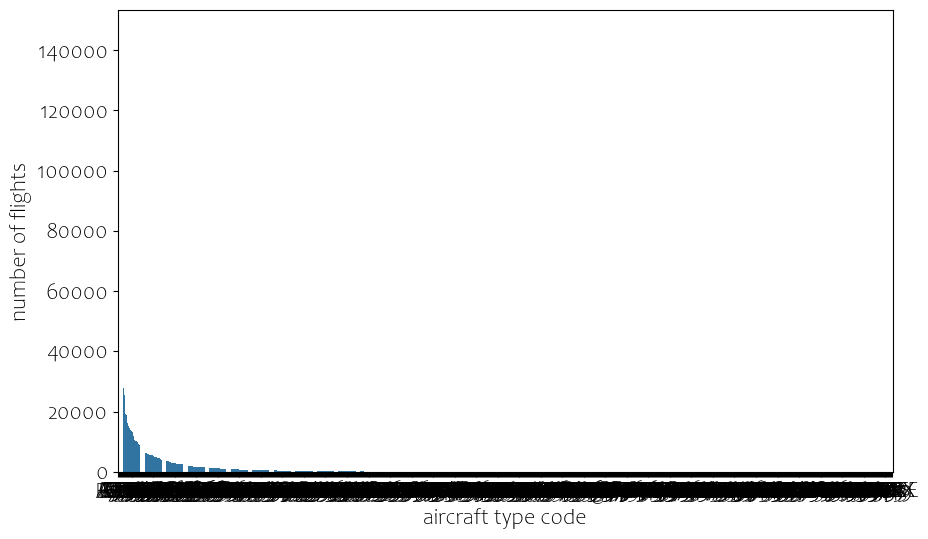

In [211]:
fig, ax = plt.subplots(1, figsize=(10,6))
sns.barplot(data=data, x="typecode", y="count", color="tab:blue")
ax.set_xlabel("aircraft type code")
ax.set_ylabel("number of flights")
plt.show()

## 2. Line plot

In [213]:
sns.lineplot(data=data, x="hour", y="count", hue"kind", ax=ax)

# and other things to make it better
# with conf id

UndefinedVariableError: name 'weekday' is not defined

## 3. Histogram and kdeplot

In [ ]:
sns.histplot(binwidth=30)
sns.kdeplot()

## 4. boxplot for distributions

In [ ]:
sns.boxplot(data=data, x="aiport", color="tab:blue", hue="kind") # adding hue to get grouped results

## 5. violinplot for distributions (kernel density estimations)

In [ ]:
sns.violinplot(data etc, split=True, palette="set2", inner="quartile")

## 6. jointplot for two related parameters
histogram or kernel density

In [ ]:
sns.jointplot(data=data, x="duration", y="distance", marker="+") # relation between dur and dist

# scatterplot NOT used if there are many overlapping points, takes a bit longer
sns.jointplot(data=data, x="duration", y="distance", kind="kde") # relation between dur and dist



## 7. relational plot for same parameter over different groups

In [ ]:
sns.relplot(data=data, hue="kinds", col="airport")
sns.relplot(data=data, hue="kinds", col="airport", col_wrap=4, kind="line") # instead of scatter